# Project 2: Predict Home Sale Price for Ames Iowa Housing

## Executive Summary

### Overview

The Ames housing data contains many recorded features of homes in Ames, IA. Our goal is to create a regression model that accuratley predicts the price of houses in Ames,IA. All the while keeping in mind certain important reccomendations for home buyers when investing in a home or selling their home. 

### Problem Statement

This technical report steps through the workflow of building a predictive model to more accuratley predict house prices in Ames, IA. Multiple rgression models (Linear rgression, lasso regression and KNN regression) are evaluated in order to select a production model with the least amount of error (e.g. bias) that generalizes well to the data (.e.g low variance b/w test and train scores). 

Throughout the report we'll seek to identify trends in the data and answers relevant questions to homeowenrs such as which features add the most value to a home, which features hurt home value the most, things homeowners can do to improve the value of their homes, preferred neighborhoods and whether or not this model would work across other cities. 

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis and Feature Engineering](#EDA-and-Feature-Engineering)
- [Model Preparation](#Model-Prep:-Create-our-features-matrix-and-target-vector)
- [Model Evaluation](#Model-Evaluation)
- [Production Model Selection](#Production-Model-Selection)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Submission Prep and Export](#Data-Save-and-Export)

### Dataset Overview

#### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Id|int64|train,test|Unique record identifier|
|PID|int64|train,test|Alternative unique record identifier|
|MS SubClass|int64|train,test|The building class (e.g. Duplex, 1-Story 1946 & Newer All Styles etc.)|
|MS Zoning|object|train,test|Identifies the general zoning classification of the sale (e.g. A - Agirculture, C - Commercial, etc)|
|Lot Frontage|float64|train,test|Linear feet of street connected to property|
|Lot Area|int64|train,test|Lot size in square feet|
|Street|object|train,test|Type of road access to property (Gravel or Paved)|
|Alley|object|train,test|Type of alley access to property|
|Lot Shape|object|train,test|General shape of property|
|Land Contour|object|train,test|Flatness of the property|
|Utilities|object|train,test|Type of utilities available|
|Lot Config|object|train,test|Lot configuration|
|Land Slope|object|train,test|Flatness of the property|
|Neighborhood|object|train,test|Physical locations within Ames city limits|
|Condition 1|object|train,test|Proximity to main road or railroad|
|Condition 2|object|train,test|Proximity to main road or railroad (if second is present)|
|Bldg Type|object|train,test|Type of dwelling|
|House Style|object|train,test|Style of dwelling
|Overall Qual|int64|train,test|Overall material and finish quality|
|Overall Cond|int64|train,test|Overall condition rating|
|Year Built|int64|train,test|Original construction date|
|Year Remod/Add|int64|train,test|Remodel date (same as construction date if no remodeling or additions)|
|Roof Style|object|train,test|Type of roof|
|Roof Matl|object|train,test|Roof material|
|Exterior 1st|object|train,test|Exterior covering on house|
|Exterior 2nd|object|train,test|Exterior covering on house (if more than one material)|
|Mas Vnr Type|object|train,test|Masonry veneer type|
|Mas Vnr Area|float64|train,test|Masonry veneer area in square feet|
|Exter Qual|object|train,test|Exterior material quality|
|Exter Cond|object|train,test|Present condition of the material on the exterior|
|Foundation|object|train,test|Type of foundation|
|Bsmt Qual|object|train,test|Height of the basement|
|Bsmt Cond|object|train,test|General condition of the basement|
|Bsmt Exposure|object|train,test|Walkout or garden level basement walls|
|BsmtFin Type 1|object|train,test|Quality of basement finished area|
|BsmtFin SF 1|int64|train,test|Type 1 finished square feet|
|BsmtFin Type 2|object|train,test|Quality of second finished area (if present)|
|BsmtFin SF 2|int64|train,test|Type 2 finished square feet|
|Bsmt Unf SF|int64|train,test|Unfinished square feet of basement area|
|Total Bsmt SF|int64|train,test|Total square feet of basement area|
|Heating|object|train,test|Type of heating|
|Heating QC|object|train,test|Heating quality and condition|
|Central Air|object|train,test|Central air conditions (Y/N)|
|Electrical|object|train,test|Electrical system|
|1st Flr SF|int64|train,test|First floor square feet|
|2nd Flr SF|int64|train,test|Second floor square feet|
|Low Qual Fin SF|int64|train,test|Low quality finished square feet (all floors)|
|Gr Liv Area|int64|train,test|Above grade(ground) living area square feet|
|Bsmt Full Bath|int64|train,test|Basement full bathrooms|
|Bsmt Half Bath|int64|train,test|Basement half bathrooms|
|Full Bath|int64|train,test|Full bathrooms above grade|
|Half Bath|int64|train,test|Half baths above grade|
|Bedroom AbvGr|int64|train,test|Number of bedrooms above basement level|
|Kitchen AbvGr|int64|train,test|Number of kitchens|
|Kitchen Qual|object|train,test|Kitchen quality|
|TotRms AbvGrd|int64|train,test|Total rooms above grade (does not include bathrooms)|
|Functional|object|train,test|Home functionality rating|
|Fireplaces|int64|train,test|Number of fireplaces|
|Fireplace Qu|object|train,test|Fireplace quality|
|Garage Type|object|train,test|Garage Location|
|Garage Yr Blt|float64|train,test|Year garage was built|
|Garage Finish|object|train,test|Interior finish of the garage|
|Garage Cars|int64|train,test|Size of garage in car capacity|
|Garage Area|int64|train,test|Size of garage in square feet|
|Garage Qual|object|train,test|Garage quality|
|Garage Cond|object|train,test|Garage condition|
|Paved Drive|object|train,test|Paved driveway|
|Wood Deck SF|int64|train,test|Wood deck area in square feet|
|Open Porch SF|int64|train,test|Open porch area in square feet|
|Enclosed Porch|int64|train,test|Enclosed porch area in square feet|
|3Ssn Porch|int64|train,test|Three season porch area in square feet|
|Screen Porch|int64|train,test|Screen porch area in square feet|
|Pool Area|int64|train,test|Pool area in square feet|
|Pool QC|object|train,test|Pool quality|
|Fence|object|train,test|Fence quality|
|Misc Feature|object|train,test|Miscellaneous feature not coveed in other categories (Elevator, Shed, etc)|
|Misc Val|int64|train,test|$ Value of miscellaneous feature|
|Mo Sold|int64|train,test|Month sold|
|Yr Sold|int64|train,test|Year sold|
|Sale Type|object|train,test|Type of sale|
|SalePrice|int64|test|Price of sale|

*A more detailed data dictionary exists on the Kaggle website [here](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data)


#### Provided Data

For this project, I've used the following two datasets as source data:

- [Test Data](./datasets/test.csv)
- [Training Data](./datasets/train.csv)
- [Sample Output](./datasets/sample_sub_reg.csv)

You can see the sources for the test and train data [here](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data)

Additionally, I've created the following output dataset for submission to the Kaggle website.

- [Submission Data](./datasets/submission_lasso.csv)

#### Primary Findings & Insights

I selected the ridge regression model as my production model given it's ability select the most impactful data features on the target vector of sales price and tune-out the noise of the remaining features. This is an import feature of the ride model and I chose to leverage it here given my lower scoring intial results with feature engineering and linear regression models as well as the shear amount of features in this dataset (>80). 

The production model I selected was a ridge model that scored 88.4% & 88.5% respectively on the train-test split in the training data and shows an 85% cross-validation score on the entire training dataset. When compared to the lasso model I originally submited, this model indicated it would generalize better and have lower variance (~90% train and 87% test). The first submission lasso model predicted home prices with a 35970.80162 RMSE whereas the second submission ridge model predicted home prices with a 37449.86822 RMSE in the Kaggle competition. Althought the RMSE was higher in the final compatition, I do believe the ridge model will generalize better to data in other cities and have selected it as my production model.

Through exploratory analysis of the model coefficients it is clear that the features with the largest impact on home prices are unsurprisingly: 

Related to the total size of the home (houses are traditionally valued by the sqft)
- Lot area
- Total basement sqft
- 1st floor sqft
- 2nd floor sqft
- Ground living area 
- Garage # of cars

Related to the age, quality and conditon of the home
- Overall quality of the home
- Overall condition of the home
- Year built
- Year re-modelled
- Home functionality rating

Related to additional upgrades or desirable features in the home
- Basement full bath
- Number of fireplaces
- Miscaleanous features valus (Tennis court, 2nd Garage, large shed, etc)
- Roof Material
- Number of Full Baths
- Total rooms above ground
- Screen Porch

*Caveat to this is that the model shows these features are correlated to higher prices but that does not necissarily indicated their relationships is causal. It could be possible that large highly priced homes with higher sqft just happen to already have these features on average. The model could be picking up and predicting this trend.

Although the model does not assign a large coefficient to neighborhood, this could very well be due to the fact that the neighborhoods were discrete cateogrical and not continuous variables. Given what we all know to be true of real estate in the real world, if we had median saleprice information by neighbordhood or a neighborhood score, I believe this category would have had a much higher weighting in the model. As we all know from our real estate agents: Location! Location! Locaton! Given that it is important to callout the most desirable neighborhoods in the Ames city limits for prospective investors. The top 5 neighbordhoods by mean salesprice are:

1. Stone Brooke - Avg saleprice of $329,676

2. Northridge Heights - Avg saleprice of $322,831

3. Northridge - Avg saleprice of $316,294

4. Green Hill - Avg saleprifce of $280,000

5. Veenker - Avg saleprice of $253,571

*Caveate here is that this information would need to be removed in order for the model to generalize well to other cities. 

#### Conclusion & Recommendations

For any homebuyers or sellers looking to transact in the Ames city limits, it is important to consider the total size of your home (sqft), the age/quality/condition of the home as well as any additional upgrades or desirable features that add value to the home. Assuming it works within their budget, I would reccomend for them to first look for homes in the Stone Brook, Northridge Heights, Northridge, Green Hill and Veenker neighborhoods prior to searching for homes in other areas. 

#### Next Steps

Moving onto the next phase of this analysis would require additional time. In order to further refine the data, it would ne necissary to conduct additional feature engineering (possibly using polynomials) and then utilize both the PIPE methods and Gridsearch methods to further refine the most important features and hyperparameters in the dataset. Given more time I would ensure to utilize the PIPE method to exhaust all feature types and then leverage the Gridsearch method to fine tune multiple algorithms in order to identify the highest performing one given these updated features. 

In [1]:
#Import modules with aliases:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

## Data Import and Cleaning

#### Read in test and train data

Read in the `test.csv` and `train.csv` files and assign them pandas dataframes

In [2]:
#Import data for test and train
df_te = pd.read_csv('datasets/test.csv')
df_tr = pd.read_csv('datasets/train.csv')

#### Display the data
Print the first 10 rows of each dataframe

In [3]:
#Change the view options so all columns can be displayed
pd.set_option('display.max_columns',None)
df_te.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
df_tr.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Check data completness, size and dtypes
Use the .info() function in order review each data feature's completness and data type

In [5]:
#Check the datasets for null values 
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Data cleaning: Remove redundant columns or those with too many nan's

Remove the following features test & train datasets due to lack of data and null values:
- Misc Feature: 41 non-null
- Fence: 172 non-null
- Pool QC: 4 non-null
- Fireplace Qu: 456 non-null
- Alley: 58 non-null
- PID: Can be dropped as it is redundant

In [6]:
#Drop columns from test data set
df_te = df_te.drop(columns = ['PID','Misc Feature','Fence','Pool QC','Fireplace Qu','Alley'])

In [7]:
df_te.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


In [8]:
#Look at the non-object columns nan values to see which should be cleaned
#The object values need to be label encoded and some nan values have meaning
df_te.select_dtypes(include = ['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   Lot Frontage     718 non-null    float64
 3   Lot Area         878 non-null    int64  
 4   Overall Qual     878 non-null    int64  
 5   Overall Cond     878 non-null    int64  
 6   Year Built       878 non-null    int64  
 7   Year Remod/Add   878 non-null    int64  
 8   Mas Vnr Area     877 non-null    float64
 9   BsmtFin SF 1     878 non-null    int64  
 10  BsmtFin SF 2     878 non-null    int64  
 11  Bsmt Unf SF      878 non-null    int64  
 12  Total Bsmt SF    878 non-null    int64  
 13  1st Flr SF       878 non-null    int64  
 14  2nd Flr SF       878 non-null    int64  
 15  Low Qual Fin SF  878 non-null    int64  
 16  Gr Liv Area      878 non-null    int64  
 17  Bsmt Full Bath  

Columns with nan row entries to be cleaned:
- Lot Frontage: Mean reverted
- Mas Vnr Area: 1 nan removed
- Garage Year Built: 45 nan removed

#### Max 45/878 rows to be cleaned of int/float dtype

In [9]:
#Replace the null values in the Lot Frontage column with the mean value from that column
mean = round(df_te['Lot Frontage'].mean(),0)
df_te['Lot Frontage'] = df_te['Lot Frontage'].fillna(mean)

#The same for garage year built
mean2 = round(df_te['Garage Yr Blt'].mean(),0)
df_te['Garage Yr Blt'] = df_te['Garage Yr Blt'].fillna(mean2)

#Thr same for mas_vnr_area
mean3 = round(df_te['Mas Vnr Area'].mean(),0)
df_te['Mas Vnr Area'] = df_te['Mas Vnr Area'].fillna(mean3)

#Check
df_te.select_dtypes(include = ['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   Lot Frontage     878 non-null    float64
 3   Lot Area         878 non-null    int64  
 4   Overall Qual     878 non-null    int64  
 5   Overall Cond     878 non-null    int64  
 6   Year Built       878 non-null    int64  
 7   Year Remod/Add   878 non-null    int64  
 8   Mas Vnr Area     878 non-null    float64
 9   BsmtFin SF 1     878 non-null    int64  
 10  BsmtFin SF 2     878 non-null    int64  
 11  Bsmt Unf SF      878 non-null    int64  
 12  Total Bsmt SF    878 non-null    int64  
 13  1st Flr SF       878 non-null    int64  
 14  2nd Flr SF       878 non-null    int64  
 15  Low Qual Fin SF  878 non-null    int64  
 16  Gr Liv Area      878 non-null    int64  
 17  Bsmt Full Bath  

## Repeat the same data cleaning exercise on the training dataset - ensuring to keep column dimension the exact same as test data

In [10]:
#Check the training dataset for null values
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Remove the following features from test datasets due to lack of data and null values:
- Misc Feature: 65 non-null
- Fence: 400 non-null
- Pool QC: 9 non-null
- Fireplace Qu: 1051 non-null
- Alley: 140 non-null
- PID Can be dropped as it is redundant

In [11]:
#Drop columns from train data set
df_tr = df_tr.drop(columns = ['PID','Misc Feature','Fence','Pool QC','Fireplace Qu','Alley'])

In [12]:
#Check new columns
df_tr.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [13]:
#Look at the non-object columns nan values to see which should be cleaned
#The object values need to be label encoded and some nan values have meaning
df_tr.select_dtypes(include = ['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Overall Qual     2051 non-null   int64  
 5   Overall Cond     2051 non-null   int64  
 6   Year Built       2051 non-null   int64  
 7   Year Remod/Add   2051 non-null   int64  
 8   Mas Vnr Area     2029 non-null   float64
 9   BsmtFin SF 1     2050 non-null   float64
 10  BsmtFin SF 2     2050 non-null   float64
 11  Bsmt Unf SF      2050 non-null   float64
 12  Total Bsmt SF    2050 non-null   float64
 13  1st Flr SF       2051 non-null   int64  
 14  2nd Flr SF       2051 non-null   int64  
 15  Low Qual Fin SF  2051 non-null   int64  
 16  Gr Liv Area      2051 non-null   int64  
 17  Bsmt Full Bath

Columns with nan row entries to be cleaned:
- Lot Frontage: Mean - to stay consistent with test dataset
- Mas Vnr Area: Mean - to stay consistent with test dataset
- BsmtFin SF removed: 1 nan removed
- BsmtFin SF 2: 1 nan removed
- Bsmt Unf SF: 1 nan removed
- Total Bsmt SF: 1 nan removed
- Bsmt Full Bath: 2 nan removed
- Bsmt Half Bath: 2 nan removed
- Garage Year Built: Mean - to stay consistent with test dataset
- Garage Cars: 1 nan removed
- Garage Area: 1 nan removed

#### Max 8/2051 rows to be removed of int/float dtype

In [14]:
#Replace the null values in the Lot Frontage column with the mean value from that column
mean = round(df_tr['Lot Frontage'].mean(),0)
df_tr['Lot Frontage'] = df_tr['Lot Frontage'].fillna(mean)

#The same for garage year built
mean2 = round(df_tr['Garage Yr Blt'].mean(),0)
df_tr['Garage Yr Blt'] = df_tr['Garage Yr Blt'].fillna(mean2)

#Thr same for mas_vnr_area
mean3 = round(df_tr['Mas Vnr Area'].mean(),0)
df_tr['Mas Vnr Area'] = df_tr['Mas Vnr Area'].fillna(mean3)

#Check
df_tr.select_dtypes(include = ['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Overall Qual     2051 non-null   int64  
 5   Overall Cond     2051 non-null   int64  
 6   Year Built       2051 non-null   int64  
 7   Year Remod/Add   2051 non-null   int64  
 8   Mas Vnr Area     2051 non-null   float64
 9   BsmtFin SF 1     2050 non-null   float64
 10  BsmtFin SF 2     2050 non-null   float64
 11  Bsmt Unf SF      2050 non-null   float64
 12  Total Bsmt SF    2050 non-null   float64
 13  1st Flr SF       2051 non-null   int64  
 14  2nd Flr SF       2051 non-null   int64  
 15  Low Qual Fin SF  2051 non-null   int64  
 16  Gr Liv Area      2051 non-null   int64  
 17  Bsmt Full Bath

### Check each string type/categorical/discrete value column for data completness 

Focus on the string features that will require label encoding later on during feature engineering

In [15]:
#Check for odd values in categorical/labeled,discrete and string type features 
df_te['MS SubClass'].unique()
df_tr['MS SubClass'].unique()
df_te['MS Zoning'].unique()
df_tr['MS Zoning'].unique()
df_te['Lot Frontage'].unique()
df_tr['Lot Frontage'].unique()
df_te['Street'].unique()
df_tr['Street'].unique()
df_te['Lot Shape'].unique()
df_tr['Lot Shape'].unique()
df_te['Land Contour'].unique()
df_tr['Land Contour'].unique()
df_te['Utilities'].unique()
df_tr['Utilities'].unique()
df_te['Lot Config'].unique()
df_tr['Lot Config'].unique()
df_te['Land Slope'].unique()
df_tr['Land Slope'].unique()
df_te['Neighborhood'].unique()
df_tr['Neighborhood'].unique()
df_te['Condition 1'].unique()
df_tr['Condition 1'].unique()
df_te['Condition 2'].unique()
df_tr['Condition 2'].unique()
df_te['Bldg Type'].unique()
df_tr['Bldg Type'].unique()
df_te['House Style'].unique()
df_tr['House Style'].unique()
df_te['House Style'].unique()
df_te['Year Built'].unique()
df_tr['Year Built'].unique()
df_te['Year Remod/Add'].unique()
df_tr['Year Remod/Add'].unique()
df_te['Roof Style'].unique()
df_tr['Roof Style'].unique()
df_te['Roof Matl'].unique()
df_tr['Roof Matl'].unique()
df_te['Exterior 1st'].unique()
df_tr['Exterior 1st'].unique()
df_te['Exterior 2nd'].unique()
df_tr['Exterior 2nd'].unique()
df_te['Mas Vnr Type'].unique()
df_tr['Mas Vnr Type'].unique()
df_te['Exter Qual'].unique()
df_tr['Exter Qual'].unique()
df_te['Exter Cond'].unique()
df_tr['Exter Cond'].unique()
df_te['Foundation'].unique()
df_tr['Foundation'].unique()
df_te['Bsmt Qual'].unique()
df_tr['Bsmt Qual'].unique()
df_te['Bsmt Cond'].unique()
df_tr['Bsmt Cond'].unique()
df_te['Bsmt Exposure'].unique()
df_tr['Bsmt Exposure'].unique()
df_te['BsmtFin Type 1'].unique()
df_tr['BsmtFin Type 1'].unique()
df_te['BsmtFin Type 2'].unique()
df_tr['BsmtFin Type 2'].unique()
df_te['Heating'].unique()
df_tr['Heating'].unique()
df_te['Heating QC'].unique()
df_tr['Heating QC'].unique()
df_te['Central Air'].unique()
df_tr['Central Air'].unique()
df_te['Electrical'].unique()
df_tr['Electrical'].unique()
df_te['Kitchen Qual'].unique()
df_tr['Kitchen Qual'].unique()
df_te['Functional'].unique()
df_tr['Functional'].unique()
df_te['Garage Type'].unique()
df_tr['Garage Type'].unique()
df_te['Garage Yr Blt'].unique()
df_tr['Garage Yr Blt'].unique()
df_te['Garage Finish'].unique()
df_tr['Garage Finish'].unique()
df_te['Garage Qual'].unique()
df_tr['Garage Qual'].unique()
df_te['Garage Cond'].unique()
df_tr['Garage Cond'].unique()
df_te['Paved Drive'].unique()
df_tr['Paved Drive'].unique()
df_te['Mo Sold'].unique()
df_tr['Mo Sold'].unique()
df_te['Yr Sold'].unique()
df_tr['Yr Sold'].unique()
df_te['Sale Type'].unique()
df_tr['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

### Check each continuous value column for data completness (e.g. no negative values, strange min/max's)

In [16]:
#Check for odd entries in continuous features within training dataset
df_tr.describe()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.046319,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.699171,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.724037,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,21.306367,6742.488909,1.426271,1.104497,30.177889,21.036250,174.021772,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,24.723681,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,69.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [17]:
#Check for odd entries in continuous features within test dataset
df_te.describe()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,58.268793,69.628702,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.235763,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.772210,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,42.235407,21.279884,10002.674602,1.369065,1.128903,30.395895,20.450725,187.052174,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.022053,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,20.000000,60.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,50.000000,70.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


#### Data completnesss and integrity:
- There are no odd values that need to be cleaned out or removed from specific columns in the dataset
- Some columns do contain N/A values but given that some of them have a direct translation of None or 0 in the data dictionary provided, they can remain. For the other portion of nan's still in the data set, they are so few in number that prior to removing any rows, it's first pertinent to review whether these data columns will even have a large impact on Sales prices. 

#### Features to be re-engineered (e..g all string type columns and Lot Frontage):

1. MS Zoning to be label encoded 
2. Lot Frontage has nan values that need to be mean or regression replaced
3. Street to be label encoded
4. Lot shape to be label encoded
5. Land Contour to be label encoded 
6. Utilities to be label encoded
7. Lot Confir to be label encoded
8. Land Slope to be label encoded
9. Neighborhood to be label encoded
10. Condition 1 to be label encoded
11. Condition 2 to be label encoded
12. Bldg Type to be label encoded
13. House style to be label encoded
14. Roof style to be label encoded
15. Roof Matl to be label encoded
16. Exterior 1st to be label encoded
17. Exterior 2nd to be label encoded
18. Mas Vnr Type to be label encoded
19. Exter Qual to be label encoded
20. Exter Cond to be label encoded
21. Foundation to be label encoded
22. Bsmt Qual to be label encoded
23. Bsmt Cond to be label encoded
24. Bsmt Exposure to be label encoded
25. BsmtFin Type 1 to be label encoded
26. BsmtFin Type 2 to be label encoded
27. Heating to be label encoded
28. Heating QC to be label encoded
29. Central Air to be label encoded
30. Kitchen Qual to be label encoded
31. Functional to be label encoded
32. Garage type to be label encoded
33. Garage finish to be label encoded
34. Garage Qual to be label encoded
35. Garage Cond to be label encoded
36. Paved Drive to be labele encoded

### Remove any duplicate rows

In [18]:
#Count rows prior to drop dups
df_tr.count()

Id              2051
MS SubClass     2051
MS Zoning       2051
Lot Frontage    2051
Lot Area        2051
                ... 
Misc Val        2051
Mo Sold         2051
Yr Sold         2051
Sale Type       2051
SalePrice       2051
Length: 75, dtype: int64

In [19]:
#Drop duplicates in the training dataframe
df_tr = df_tr.drop_duplicates()

In [20]:
#Count rows after dups drop
df_tr.count()

Id              2051
MS SubClass     2051
MS Zoning       2051
Lot Frontage    2051
Lot Area        2051
                ... 
Misc Val        2051
Mo Sold         2051
Yr Sold         2051
Sale Type       2051
SalePrice       2051
Length: 75, dtype: int64

In [21]:
#Count rows prior to drop dups
df_te.count()

Id              878
MS SubClass     878
MS Zoning       878
Lot Frontage    878
Lot Area        878
               ... 
Pool Area       878
Misc Val        878
Mo Sold         878
Yr Sold         878
Sale Type       878
Length: 74, dtype: int64

In [22]:
df_te = df_te.drop_duplicates()

In [23]:
#Count rows after dups drop
df_te.count()

Id              878
MS SubClass     878
MS Zoning       878
Lot Frontage    878
Lot Area        878
               ... 
Pool Area       878
Misc Val        878
Mo Sold         878
Yr Sold         878
Sale Type       878
Length: 74, dtype: int64

#### No duplicates in the dataset!

### Rename columns to ensure they are all lowercase, do not contain spaces and are unique/informative

Rename the column headers in the `test.csv` and `train.csv` files

In [24]:
#Create updated column name dictionary for training data
list_headers_old = df_tr.columns.tolist()
list_headers_new = [x.replace(' ','_').lower() for x in list_headers_old]
dict_headers_train = {key:value for key,value in zip(list_headers_old,list_headers_new)}

#Renaming the column headers for train datasets
df_tr.rename(columns= dict_headers_train, inplace = True)

#Create updated column name dictionary for test data
list_headers_old_te = df_te.columns.tolist()
list_headers_new_te = [x.replace(' ','_').lower() for x in list_headers_old]
dict_headers_te = {key:value for key,value in zip(list_headers_old_te,list_headers_new_te)}

#Renaming the column headers for test datasets
df_te.rename(columns= dict_headers_te, inplace = True)

#Display the dataframes to validate updated columns names
df_tr.head()
df_te.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,70.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,70.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


### Data Cleaning: Check/remove nan values selected continuous features 

Test
- Mas Vnr Area:1 nan to be removed
- Garage Yr Built: 45 nan to be removed  

Train
- Mas Vnr Area: 22 nan to be removed
- BsmtFin SF: 1 nan removed
- BsmtFin SF 2: 1 nan removed
- Bsmt Unf SF: 1 nan removed
- Total Bsmt SF: 1 nan removed
- Bsmt Full Bath: 2 nan removed
- Bsmt Half Bath: 2 nan removed
- Garage Year Built: 114 nan removed
- Garage Cars: 1 nan removed
- Garage Area: 1 nan removed

In [25]:
df_tr.isnull().sum() 

id              0
ms_subclass     0
ms_zoning       0
lot_frontage    0
lot_area        0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 75, dtype: int64

In [26]:
#Check float na's
df_tr[['mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_area','garage_cars']].info()
df_te[['mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_area','garage_cars']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mas_vnr_area    2051 non-null   float64
 1   bsmtfin_sf_1    2050 non-null   float64
 2   bsmtfin_sf_2    2050 non-null   float64
 3   bsmt_unf_sf     2050 non-null   float64
 4   total_bsmt_sf   2050 non-null   float64
 5   bsmt_full_bath  2049 non-null   float64
 6   bsmt_half_bath  2049 non-null   float64
 7   garage_yr_blt   2051 non-null   float64
 8   garage_area     2050 non-null   float64
 9   garage_cars     2050 non-null   float64
dtypes: float64(10)
memory usage: 176.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mas_vnr_area    878 non-null    float64
 1   bsmtfin_sf_1    878 non-null    int64  
 2   bsmtfin_sf_2    878 

In [27]:
#Check size of test,train datatest prior to dropping nan's
print(df_tr.shape,df_te.shape)

(2051, 75) (878, 74)


In [28]:
#Drop nan values in selected train columns
df_tr.dropna(subset = ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_area','garage_cars'], inplace=True)

## EDA and Feature Engineering

Conduct label encoding on all string type columns identified earlier

In [29]:
#Create a list of object type columns for reference
df_tr.select_dtypes(include = 'object').columns.tolist()

['ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'sale_type']

In [30]:
#Save names of object type columns into a list
list_strings = df_tr.select_dtypes(include = 'object').columns.tolist()

#Loop to label encode all object type column entries using a dictionary of randomly assigned integer values
for col in list_strings:
    n = len(df_tr[col].unique())
    list_n = [x for x in range(n)]
    list_cats = [x for x in df_tr[col].unique()]
    dict_cat = {key:value for key,value in zip(list_cats,list_n)}
    df_tr[col] = df_tr[col].map(dict_cat)

In [31]:
#Save names of object type columns into a list
list_strings_te = df_te.select_dtypes(include = 'object').columns.tolist()

#Loop to label encode all object type column entries using a dictionary of randomly assigned integer values
for col in list_strings_te:
    n = len(df_te[col].unique())
    list_n = [x for x in range(n)]
    list_cats = [x for x in df_te[col].unique()]
    dict_cat = {key:value for key,value in zip(list_cats,list_n)}
    df_te[col] = df_te[col].map(dict_cat)

In [32]:
df_tr.info()
df_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2048 non-null   int64  
 1   ms_subclass      2048 non-null   int64  
 2   ms_zoning        2048 non-null   int64  
 3   lot_frontage     2048 non-null   float64
 4   lot_area         2048 non-null   int64  
 5   street           2048 non-null   int64  
 6   lot_shape        2048 non-null   int64  
 7   land_contour     2048 non-null   int64  
 8   utilities        2048 non-null   int64  
 9   lot_config       2048 non-null   int64  
 10  land_slope       2048 non-null   int64  
 11  neighborhood     2048 non-null   int64  
 12  condition_1      2048 non-null   int64  
 13  condition_2      2048 non-null   int64  
 14  bldg_type        2048 non-null   int64  
 15  house_style      2048 non-null   int64  
 16  overall_qual     2048 non-null   int64  
 17  overall_cond  

### EDA: Plot a Heatmap of the Correlation Matrix

Plot out the correlation of each feature to understand the best perfomring features (evaluated by correlation)

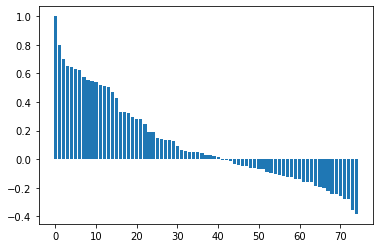

In [33]:
#Filter correlation matrix to a list of only the saleprice target vector correlations
cor=df_tr.corr()
fs_corr = cor.saleprice.sort_values(ascending=False)
plt.bar([i for i in range(len(fs_corr))],fs_corr)
plt.show()

### Select relevant features using the filter method

In [34]:
#Absolute value of corelation with output variable
cor_target = abs(cor['saleprice'])

#Selecting highly correlared features
relevant_ft = cor_target[cor_target>0.6]
relevant_ft.sort_values(ascending=False)

saleprice        1.000000
overall_qual     0.800975
gr_liv_area      0.698046
garage_area      0.650000
garage_cars      0.648103
total_bsmt_sf    0.631507
1st_flr_sf       0.621181
Name: saleprice, dtype: float64

Top 6 positivley correlated features are:

- overall_qual       0.800207
- gr_liv_area        0.697038
- garage_area        0.650270
- garage_cars        0.648220
- total_bsmt_sf      0.628925
- 1st_flr_sf         0.618486

### Check the cross correlation of top correlated features

In [35]:
#Build a relevant feature dataframe
df_tr_rel = df_tr[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','saleprice']]
df_tr_rel.head()

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,saleprice
0,6,1479,475.0,2.0,725.0,725,130500
1,7,2122,559.0,2.0,913.0,913,220000
2,5,1057,246.0,1.0,1057.0,1057,109000
3,5,1444,400.0,2.0,384.0,744,174000
4,6,1445,484.0,2.0,676.0,831,138500


<AxesSubplot:>

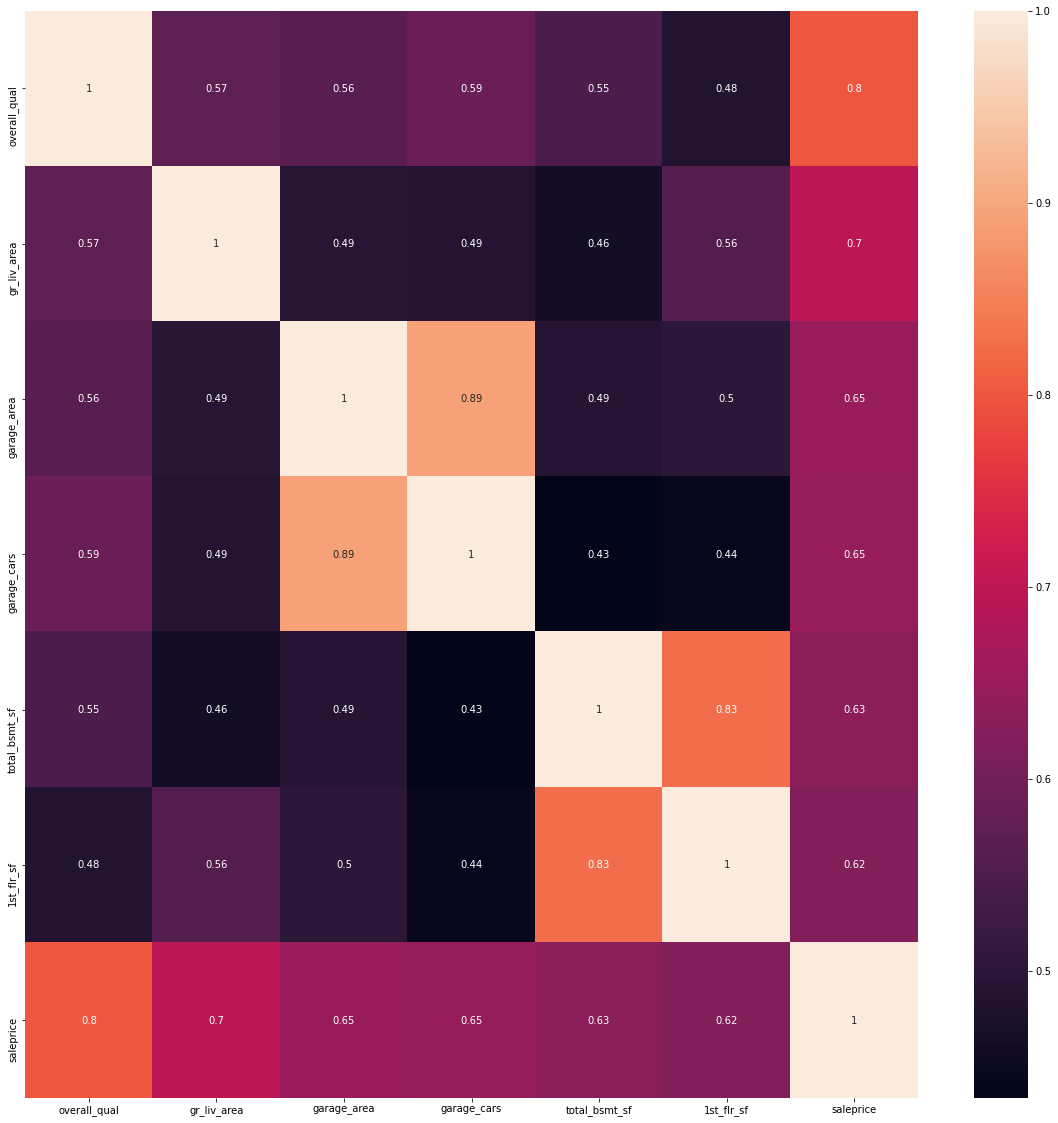

In [36]:
#Plot a heatmap of the top correlated features to understand highlighy cross correlated features
plt.figure(figsize=[20,20])

sns.heatmap(df_tr_rel.corr(),annot=True)

Features that are highly cross-correlated:
- garage area and garage cars 0.89
- 1st_flr_sf and total_bsmt_sf is 0.81

### Outliers Review in top features

/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


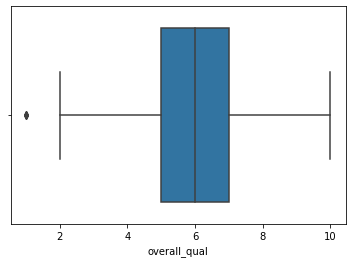

In [37]:
sns.boxplot(df_tr['overall_qual']);

In [38]:
#Keep the 4 outliers as they are valid values to train the dataset on. There can be very poor quality houses in certain
#neighborhoods and there are only 4 outliers
df_tr.loc[df_tr['overall_qual']<2,:]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
183,1554,20,4,80.0,14584,0,1,3,0,1,2,14,1,0,0,1,1,5,1952,1952,0,0,6,1,1,0.0,3,4,3,3,2,3,4,0.0,2,0.0,0.0,0.0,3,4,1,2,733,0,0,733,0.0,0.0,1,0,2,1,2,4,6,0,0,1952.0,1,2.0,487.0,1,3,1,0,0,0,0,0,0,0,2,2008,0,13100
635,2904,20,4,125.0,31250,0,1,0,0,1,0,9,3,0,0,1,1,3,1951,1951,0,0,12,1,1,0.0,1,2,0,3,2,3,4,0.0,2,0.0,0.0,0.0,0,1,0,2,1600,0,0,1600,0.0,0.0,1,1,3,1,1,6,1,0,0,1951.0,1,1.0,270.0,1,0,1,0,0,135,0,0,0,0,5,2006,0,81500
1372,766,30,0,69.0,10020,0,0,3,0,1,1,4,1,0,0,1,1,1,1922,1950,0,0,2,2,1,0.0,3,2,2,2,4,1,5,350.0,0,0.0,333.0,683.0,0,2,1,2,904,0,0,904,1.0,0.0,0,1,1,1,2,4,3,0,4,1979.0,3,0.0,0.0,2,2,0,0,0,0,0,0,0,0,3,2009,0,61000
1428,1902,20,0,50.0,5000,0,1,3,0,1,2,22,1,0,0,1,1,3,1946,1950,0,0,1,1,1,0.0,3,2,3,3,2,3,4,0.0,2,0.0,0.0,0.0,0,3,1,1,334,0,0,334,0.0,0.0,1,0,1,1,2,2,0,0,4,1979.0,3,0.0,0.0,2,2,1,0,0,0,0,0,0,0,1,2007,0,39300


/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


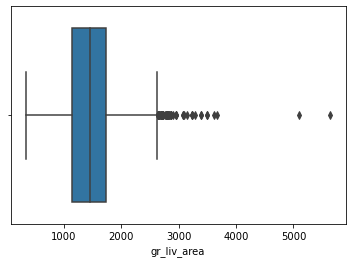

In [39]:
sns.boxplot(df_tr['gr_liv_area']);

In [40]:
#Keep both outliers as therr are only two and the dataset should be able to predict very highly valued homes
df_tr.loc[df_tr['gr_liv_area']>4000,:]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,0,313.0,63887,0,3,2,0,2,0,4,4,0,0,0,10,5,2008,2008,1,5,9,9,3,796.0,2,0,1,4,0,1,0,5644.0,0,0.0,466.0,6110.0,0,0,0,0,4692,950,0,5642,2.0,0.0,2,1,3,1,3,12,0,3,0,2008.0,2,2.0,1418.0,0,0,0,214,292,0,0,0,480,0,1,2008,1,160000
1885,2181,20,0,128.0,39290,0,0,2,0,1,0,4,1,0,0,1,10,5,2008,2009,1,0,7,6,3,1224.0,2,0,1,4,0,1,0,4010.0,0,0.0,1085.0,5095.0,0,0,0,0,5095,0,0,5095,1.0,1.0,2,1,2,1,3,15,0,2,0,2008.0,2,3.0,1154.0,0,0,0,546,484,0,0,0,0,17000,10,2007,1,183850


/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


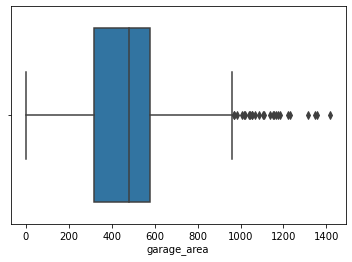

In [41]:
#No clear outliers between 1000-1400 garage area sqft
sns.boxplot(df_tr['garage_area']);

/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


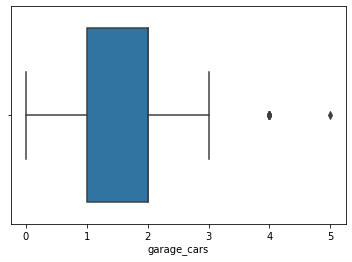

In [42]:
sns.boxplot(df_tr['garage_cars']);

/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


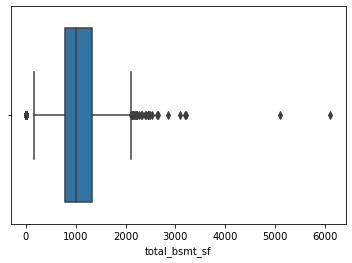

In [43]:
sns.boxplot(df_tr['total_bsmt_sf']);

/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


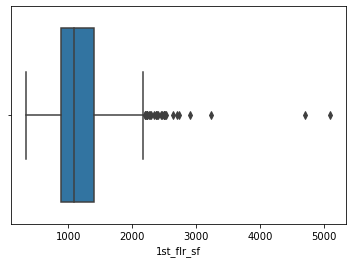

In [44]:
sns.boxplot(df_tr['1st_flr_sf']);

/Users/noah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


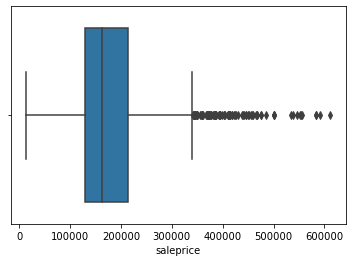

In [45]:
sns.boxplot(df_tr['saleprice']);

Given the low number of very clear outliers in the dataset (and their proximity relative to the median), there are no outliers that need to be removed from the core features in the data set

In order to generalize well, these valid large and small numbers should stay wuthin the dataset as they represent the max and min range for house features in the real world. 

## Model Prep: Create our features matrix and target vector

#### Create our features matrix (`X`) and target vector (`y`)

In [46]:
X = df_tr[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf']]
y = df_tr['saleprice']

### Model Prep: Train/test split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

### Evaluate baseline model score 

#### Linear Regression Model

In [48]:
lr = LinearRegression()

#### Baseline model score

In [49]:
cross_val_score(lr,X_train,y_train,cv=5).mean()

0.7533978415676688

#### The score reflected above means that the linear regression model performs 75% better than the baseline method which just takes the mean of the target vector. See baselined saleprice prediction for the entire train dataset below:

In [142]:
df_tr['saleprice'].mean()

181484.25244140625

### Combine features (e.g. Interaction terms)

#### Create two new interactions terms for `garage_area` x `garage_cars` and `1st_flr_sf` x `total_bsmt_sf`

In [50]:
#Create new column in both train and test dataframes
df_tr['garage_area_cars'] = df_tr['garage_area']*df_tr['garage_cars']
#Adding these two terms in order to get the total sqft 
df_tr['1stflr_totbsmt_sf'] = df_tr['1st_flr_sf']+df_tr['total_bsmt_sf']

df_te['garage_area_cars'] = df_te['garage_area']*df_te['garage_cars']
#Adding these two terms in order to get the total sqft 
df_te['1stflr_totbsmt_sf'] = df_te['1st_flr_sf']+df_te['total_bsmt_sf']

#### Create a new relevant feature matrix

In [51]:
df_tr_rel = df_tr[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','garage_area_cars','1stflr_totbsmt_sf','saleprice']]

#### EDA: Validate improved features with heatmap 

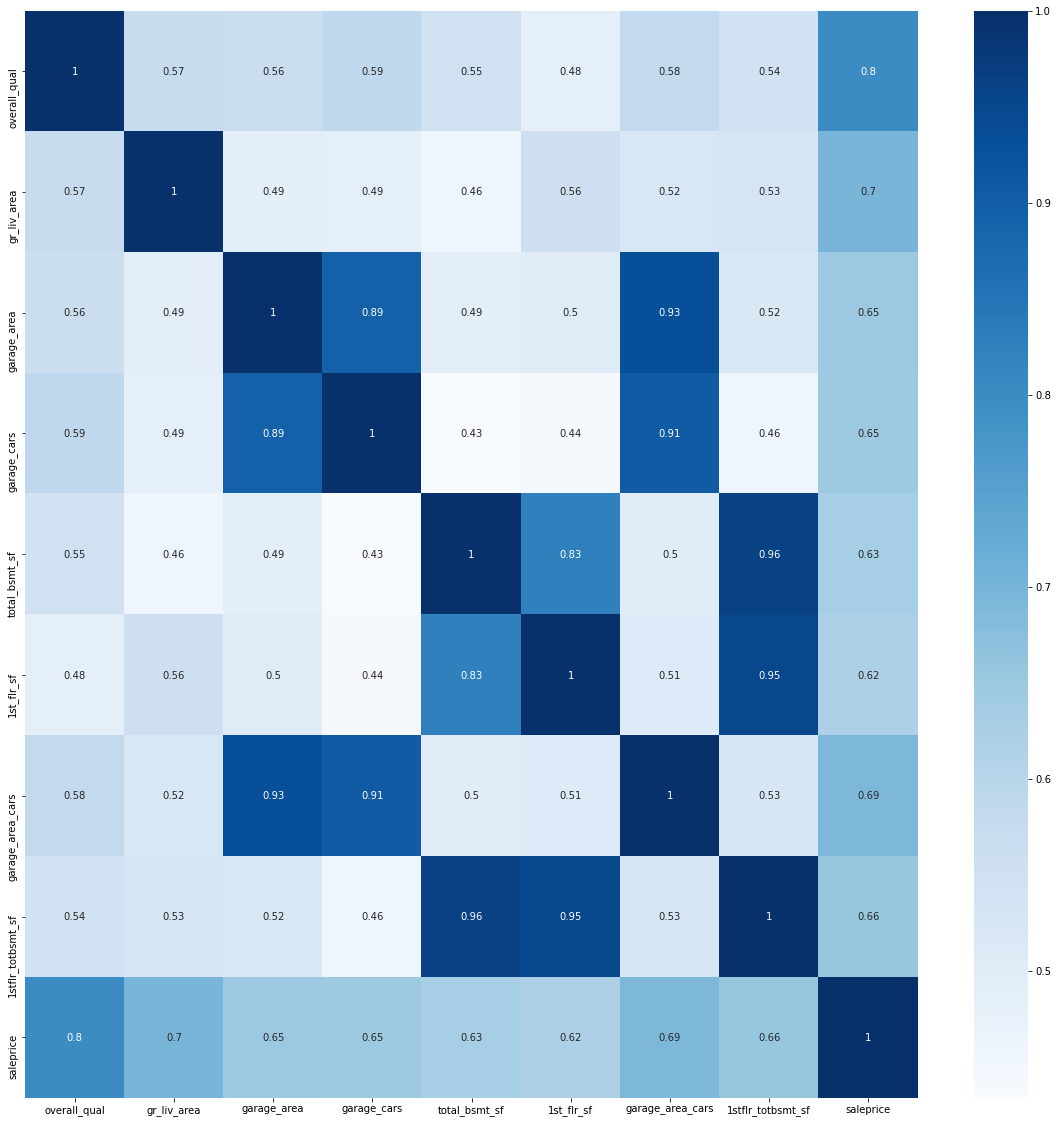

In [52]:
#Plot a heatmap 
plt.figure(figsize=[20,20])

sns.heatmap(df_tr_rel.corr(),annot=True,cmap='Blues');

#### EDA: Pairplot

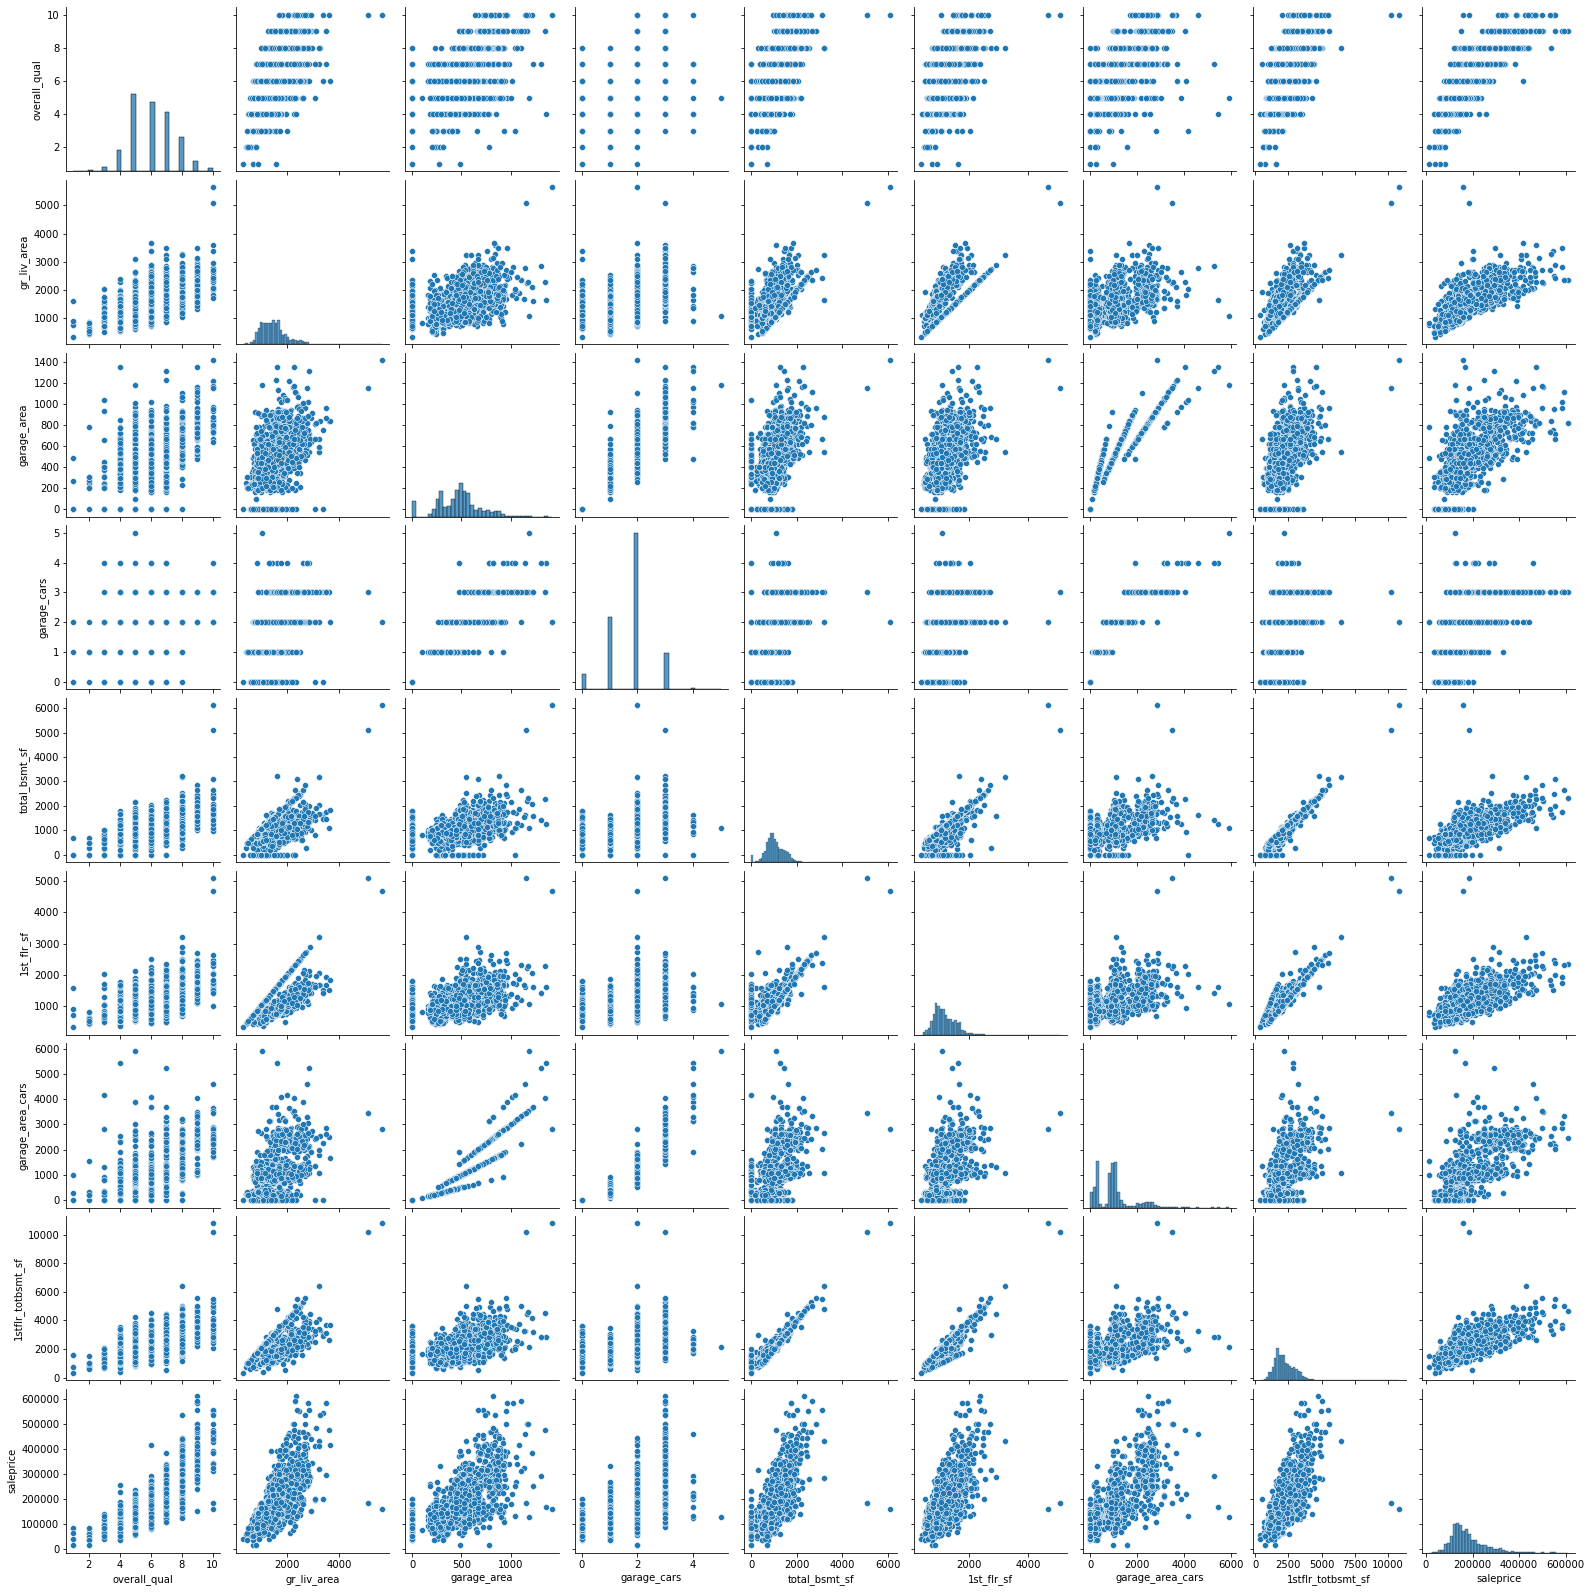

In [53]:
sns.pairplot(df_tr_rel);

Comparison of newly engineered interaction features compared to originals':
- garage_area =0.65, garage_cars = 0.65 vs. garage_area_cars = 0.69

#### garage_area_cars has a better correlation to salesprice than the originals

- total_bsmt_sf = 0.63, 1st_flr_sf = 0.62 vs. 1stflr_totbsmt_sf 0.66

#### 1stflr_totbsmt_sf has a better correlation to salesprice than the originals

### Model Evaluation using interacting terms

#### Create our features matrix (`X`) and target vector (`y`)

In [54]:
X = df_tr[['overall_qual','gr_liv_area','garage_area_cars','1stflr_totbsmt_sf']]
y = df_tr['saleprice']

### Model Prep: Train/test split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [56]:
cross_val_score(lr,X_train,y_train,cv = 5).mean()

0.7655502416808669

### Check for other important features using cross validation

#### Create our features matrix (`X`) and target vector (`y`)

In [57]:
list_cols = df_tr.columns.tolist()
list_cols.remove('saleprice')

In [58]:
X = df_tr[list_cols]
y = df_tr['saleprice']

### Model Prep: Train/test split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

#### Lasso regularization initialization 

In [60]:
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge

#Lasso model
lasso = LassoCV(n_alphas=200)

Use `cross_val_score` to evaluate our model.

In [61]:
#Linear model
cross_val_score(lr,X_train,y_train,cv=3).mean()

0.7897144895751257

In [62]:
#Lasso model
cross_val_score(lasso,X_train,y_train,cv=3).mean()

0.6963309763956372

In [63]:
#Lasso model fit and evaluation
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.7659371872922052

In [64]:
lasso.score(X_test,y_test)

0.827477267496654

In [65]:
#Look at lasso coefficients
coef = lasso.coef_

In [66]:
#Create a dictionary of lasso coefficients and filter out 0 coefficients
lass_coef = {key:value for key,value in zip(list_cols,coef)}
filter_lass_coef = {key:value for key,value in lass_coef.items() if abs(value) > 3}
filter_lass_coef

{'ms_subclass': -22.621834801861862,
 'year_built': 314.82399902241934,
 'year_remod/add': 268.123202758777,
 'mas_vnr_area': 46.22355867649199,
 'bsmtfin_sf_1': 13.934124440747237,
 '2nd_flr_sf': 29.427920767250303,
 'gr_liv_area': 28.003143829009797,
 'wood_deck_sf': 32.5858276950953,
 'open_porch_sf': 8.039082371390121,
 'screen_porch': 38.39657289659294,
 'pool_area': -21.76397439864208,
 'misc_val': -14.832794900686014,
 'garage_area_cars': 24.361305195763638,
 '1stflr_totbsmt_sf': 31.565630725439757}

Features identified as most associated with price include all those listed above. Additional ones to consider in model include:
- ms_subclass
- year_built
- year_remod/add
- mas_vnr_area
- bsmtfin_sf_1
- 2nd_flr_sf
- wood_deck_sf
- screen_porch
- pool_area
- misc_val

### Re-evalute Model with added features

In [67]:
#Set X and y 
X = df_tr[['ms_subclass','year_built','year_remod/add','mas_vnr_area','bsmtfin_sf_1','2nd_flr_sf','wood_deck_sf','screen_porch','pool_area','misc_val','overall_qual','gr_liv_area','garage_area_cars','1stflr_totbsmt_sf']]
y = df_tr['saleprice']

In [68]:
#Train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [69]:
#Instantiate model
lr = LinearRegression()

In [70]:
#Linear model
cross_val_score(lr,X_train,y_train,cv=3).mean()

0.7803710157730993

### Evaluate feature engineering/selection on lr model variability

In [71]:
#Remove additional features engineered above from full column name list
list_cols.remove('garage_area_cars')

In [72]:
#Remove additional features engineered above from full column name list
list_cols.remove('1stflr_totbsmt_sf')

In [73]:
#Check
list_cols

['id',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',

In [74]:
X_1 = df_tr[list_cols]
X_2 = df_tr[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf']]
X_3 = df_tr[['overall_qual','gr_liv_area','garage_area_cars','1stflr_totbsmt_sf']]
X_4 = df_tr[['ms_subclass','year_built','year_remod/add','mas_vnr_area','bsmtfin_sf_1','2nd_flr_sf','wood_deck_sf','screen_porch','pool_area','misc_val','overall_qual','gr_liv_area','garage_area_cars','1stflr_totbsmt_sf']]
y = df_tr['saleprice']

### Model Prep: Train/test split

In [75]:
#Feature set 1
X_train,X_test,y_train,y_test = train_test_split(X_1,y,test_size=0.15,random_state=42)
#Feature set 2
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y,test_size=0.15,random_state=42)
#Feature set 3
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X_3,y,test_size=0.15,random_state=42)
#Feature set 4
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(X_4,y,test_size=0.15,random_state=42)

### Model Prep: Scaling

In [76]:
#The fit transform is on X train when we're scaling 
ss = StandardScaler()
#Feature set 1
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#Feature set 2
X_train_2 = ss.fit_transform(X_train_2)
X_test_2 = ss.transform(X_test_2)
#Feature set 3
X_train_3 = ss.fit_transform(X_train_3)
X_test_3 = ss.transform(X_test_3)
#Feature set 4
X_train_4 = ss.fit_transform(X_train_4)
X_test_4 = ss.transform(X_test_4)

### Model Prep: Instantiate our models

In [77]:
#Linear regression
lr = LinearRegression()

### Linear Model cross validation

In [78]:
#Linear model dataset 1
cross_val_score(lr,X_train,y_train,cv=3).mean()

-1.995808435405692e+21

In [79]:
#Linear model dataset 2
cross_val_score(lr,X_train_2,y_train_2,cv=3).mean()

0.7532366621422707

In [80]:
#Linear model dataset 3
cross_val_score(lr,X_train_3,y_train_3,cv=3).mean()

0.7668049783727516

In [81]:
#Linear model dataset 4
cross_val_score(lr,X_train_4,y_train_4,cv=3).mean()

0.7803710157730994

Bias is reduced in the dataset that only uses the features which lasso regression selected as important. It is important to note that each of these features was identified as haveing a large correlation to salesprice in the EDA section. That said, the lasso model was able to identify some additional features of importance that we're included and did improve the R^2 score of the linear regression model better than any other subset of predictive features. 

## Model Evaluation

### Compare model results with scaled down log of y target vector

In [86]:
#Set X and y - selected the two best performing feature sets from the previous sesction
X = df_tr[list_cols]
X_4 = df_tr[['ms_subclass','year_built','year_remod/add','mas_vnr_area','bsmtfin_sf_1','2nd_flr_sf','wood_deck_sf','screen_porch','pool_area','misc_val','overall_qual','gr_liv_area','garage_area_cars','1stflr_totbsmt_sf']]
y = np.log(df_tr['saleprice'])

In [87]:
#Train test ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(X_4,y,test_size=0.15,random_state=42)

In [88]:
#Scale whole data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test =ss.transform(X_test)

#Scale selected data features
X_train_4 = ss.fit_transform(X_train_4)
X_test_4 =ss.transform(X_test_4)

### Cross validation with linear, lasso and KNN model

In [89]:
#linear model
lr = LinearRegression()

#lasso model
lasso = LassoCV(n_alphas=200)

#ridge model
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

#KNN Rgression
knn = KNeighborsRegressor(n_neighbors=11)

In [90]:
#Linear model whole dataset
cross_val_score(lr,X_train,y_train,cv=3).mean()

-4.1117680186628327e+21

In [91]:
#Linear model dataset 4
cross_val_score(lr,X_train_4,y_train_4,cv=3).mean()

0.8057315951603363

In [92]:
#Lasso model  whole dataset
cross_val_score(lasso,X_train,y_train,cv=3).mean()

0.8352453956945661

In [93]:
#Lasso model dataset 4
cross_val_score(lasso,X_train_4,y_train_4,cv=3).mean()

0.810716107056638

In [94]:
#Ridge model  whole dataset
cross_val_score(ridge,X_train,y_train,cv=3).mean()

0.8284338784679033

In [95]:
#Ridge model dataset 4
cross_val_score(ridge,X_train_4,y_train_4,cv=3).mean()

0.806683699878416

In [96]:
#Knn regression model whole dataset
cross_val_score(knn,X_train,y_train,cv=3).mean()

0.7856836901950485

In [97]:
#Knn regression model dataset 4
cross_val_score(knn,X_train_4,y_train,cv=3).mean()

0.829142249751505

### Model Fitting and Evaluation

In [98]:
#Linear model dataset train score
lr.fit(X_train,y_train)

#Predicted values
y_pred = lr.predict(X_train)

#Calculate RMSE
rms_tr = mean_squared_error(y_train, y_pred, squared=False)

#Linear model dataset test score
#Predicted values
y_pred = lr.predict(X_test)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_e = np.exp(y_pred)
y_test_e = np.exp(y_test)

#Calculate RMSE
rms_te = mean_squared_error(y_test_e, y_pred_e, squared=False)
print(f'Variance: {abs(rms_tr-rms_te)} RMS Training: {rms_tr} RMS Test: {rms_te}')

Variance: 22553.91598650005 RMS Training: 0.1415219554063127 RMS Test: 22554.05750845546


In [99]:
#Linear model dataset 4 train score
lr.fit(X_train_4,y_train_4)

#Predicted values
y_pred_4 = lr.predict(X_train_4)

#Calculate RMSE
rms_4_tr = mean_squared_error(y_train_4, y_pred_4, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_4 = lr.predict(X_test_4)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_e_4 = np.exp(y_pred_4)
y_test_e_4 = np.exp(y_test_4)

#Calculate RMSE
rms_4_te = mean_squared_error(y_test_e_4, y_pred_e_4, squared=False)
print(f'Variance: {abs(rms_4_tr-rms_4_te)} RMS Training: {rms_4_tr} RMS Test: {rms_4_te}')

Variance: 21092.86977301385 RMS Training: 0.1686101680848839 RMS Test: 21093.038383181934


In [100]:
#Lasso model dataset train score
lasso.fit(X_train,y_train)

#Predicted values
y_pred = lasso.predict(X_train)

#Calculate RMSE
rms_tr_la = mean_squared_error(y_train, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_la = lasso.predict(X_test)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_lass = np.exp(y_pred_la)
y_test_lass = np.exp(y_test)

#Calculate RMSE
rms_te_la = mean_squared_error(y_test_lass, y_pred_lass, squared=False)
print(f'Variance: {abs(rms_tr_la-rms_te_la)} RMS Training: {rms_tr_la} RMS Test: {rms_te_la}')

Variance: 20459.00542340814 RMS Training: 0.14935144517424964 RMS Test: 20459.154774853316


In [101]:
#Lasso model dataset train score
lasso.fit(X_train_4,y_train_4)

#Predicted values
y_pred = lasso.predict(X_train_4)

#Calculate RMSE
rms_tr_la_4 = mean_squared_error(y_train_4, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_la_4 = lasso.predict(X_test_4)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_lass_4 = np.exp(y_pred_la_4)
y_test_lass_4 = np.exp(y_test)

#Calculate RMSE
rms_te_la_4 = mean_squared_error(y_test_lass_4, y_pred_lass_4, squared=False)
print(f'Variance: {abs(rms_tr_la_4-rms_te_la_4)} RMS Training: {rms_tr_la_4} RMS Test: {rms_te_la_4}')

Variance: 21897.00989185197 RMS Training: 0.17102233770256228 RMS Test: 21897.18091418967


In [102]:
#Ridge model dataset train score
ridge.fit(X_train,y_train)

#Predicted values
y_pred = ridge.predict(X_train)

#Calculate RMSE
rms_tr_la = mean_squared_error(y_train, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_la = ridge.predict(X_test)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_lass = np.exp(y_pred_la)
y_test_lass = np.exp(y_test)

#Calculate RMSE
rms_te_la = mean_squared_error(y_test_lass, y_pred_lass, squared=False)
print(f'Variance: {abs(rms_tr_la-rms_te_la)} RMS Training: {rms_tr_la} RMS Test: {rms_te_la}')

Variance: 22458.08144440185 RMS Training: 0.1415421780403121 RMS Test: 22458.22298657989


In [103]:
#Lasso model dataset train score
ridge.fit(X_train_4,y_train_4)

#Predicted values
y_pred = ridge.predict(X_train_4)

#Calculate RMSE
rms_tr_la_4 = mean_squared_error(y_train_4, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_la_4 = ridge.predict(X_test_4)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_lass_4 = np.exp(y_pred_la_4)
y_test_lass_4 = np.exp(y_test)

#Calculate RMSE
rms_te_la_4 = mean_squared_error(y_test_lass_4, y_pred_lass_4, squared=False)
print(f'Variance: {abs(rms_tr_la_4-rms_te_la_4)} RMS Training: {rms_tr_la_4} RMS Test: {rms_te_la_4}')

Variance: 21131.017954159153 RMS Training: 0.1686228536469934 RMS Test: 21131.1865770128


In [104]:
#Knn model dataset train score
knn.fit(X_train,y_train)

#Predicted values
y_pred = knn.predict(X_train)

#Calculate RMSE
rms_tr_knn = mean_squared_error(y_train, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_knn = knn.predict(X_test)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_knn = np.exp(y_pred_knn)
y_test_knn = np.exp(y_test)

#Calculate RMSE
rms_te_knn = mean_squared_error(y_test_knn, y_pred_knn, squared=False)
print(f'Variance: {abs(rms_tr_knn-rms_te_knn)} RMS Training: {rms_tr_knn} RMS Test: {rms_te_knn}')

Variance: 33181.63214087789 RMS Training: 0.17124211761090846 RMS Test: 33181.8033829955


In [105]:
#Knn model dataset train score
knn.fit(X_train_4,y_train_4)

#Predicted values
y_pred = knn.predict(X_train_4)

#Calculate RMSE
rms_tr_knn_4 = mean_squared_error(y_train_4, y_pred, squared=False)

#Linear model dataset 4 test score
#Predicted values
y_pred_knn_4 = knn.predict(X_test_4)

#Inverse log of y_test and y_pred prior to calculating rmse
y_pred_knn_4 = np.exp(y_pred_knn_4)
y_test_knn_4 = np.exp(y_test)

#Calculate RMSE
rms_te_knn_4 = mean_squared_error(y_test_knn_4, y_pred_knn_4, squared=False)
print(f'Variance: {abs(rms_tr_knn_4-rms_te_knn_4)} RMS Training: {rms_tr_knn_4} RMS Test: {rms_te_knn_4}')

Variance: 28945.496637405904 RMS Training: 0.1528973447193226 RMS Test: 28945.649534750624


In [106]:
#Lasso model dataset train score
lasso.fit(X_train,y_train)

#Lasso training score
lasso.score(X_train,y_train)

0.8713309123496803

In [107]:
#Lasso test score
lasso.score(X_test,y_test)

0.9088569981951299

In [108]:
#Ridge
ridge.fit(X_train,y_train)

#Ridge training score
ridge.score(X_train,y_train)

0.88443479040838

In [109]:
#Ridge test score
ridge.score(X_test,y_test)

0.8851080917873706

## Production Model Selection

#### Select the ridge model using log(salesprice) with all of the engineered features in the data provides a low bias while minimizing model variability when compared with lasso method.

#### Prep and scale data

In [110]:
#Set X and Y 
X_train = df_tr[list_cols]
y_train = np.log(df_tr['saleprice'])
X_test = df_te[list_cols]

In [111]:
#Verify training dataset shape
X_train.shape

(2048, 74)

In [112]:
#Verify test dataset shape
X_test.shape

(878, 74)

In [113]:
#Scale whole data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test =ss.transform(X_test)

#### Model configuration and fiting 

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
#Create a dictionary of hyperparameters
ridge_params = {
    'alpha': np.logspace(0,100,100),
}

In [116]:
#Instantiate gridsearch
ridge_gridsearch = GridSearchCV(Ridge(), # What is the model we want to fit?
                              ridge_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [117]:
#Fit the gridsearchCV object to the data
ridge_gridsearch.fit(X_train,y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.5s finished


In [118]:
# Best score
ridge_gridsearch.best_score_

0.8472044113589018

In [119]:
#ridge best parameters
ridge_gridsearch.best_params_

{'alpha': 104.76157527896652}

In [120]:
#Store the best fit model in ridge variable
ridge = ridge_gridsearch.best_estimator_

In [121]:
#Cross value score of 85%
cross_val_score(ridge,X_train,y_train,cv=3).mean()

0.8492969770848079

In [122]:
#Create predictions
preds = ridge.predict(X_test)

In [123]:
#Check the shape of the predictions
preds.shape

(878,)

In [124]:
#Reviw columns headers in data
df_te.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,garage_area_cars,1stflr_totbsmt_sf
0,2658,190,0,69.0,9142,0,0,0,0,0,0,0,0,0,0,0,6,8,1910,1950,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1020,1020,0,0,0,0,908,1020,0,1928,0,0,2,0,4,2,0,9,0,0,0,1910.0,0,1,440,0,0,0,0,60,112,0,0,0,0,4,2006,0,440,1928
1,2718,90,1,70.0,9662,0,1,0,0,0,0,1,0,0,1,1,5,4,1977,1977,0,0,1,1,0,0.0,0,1,1,1,0,0,0,0,0,0,1967,1967,0,1,1,1,1967,0,0,1967,0,0,2,0,6,2,1,10,0,0,1,1977.0,1,2,580,1,1,0,170,0,0,0,0,0,0,8,2006,0,1160,3934
2,2414,60,1,58.0,17104,0,1,0,0,0,0,2,0,0,2,0,7,5,2006,2006,0,0,2,2,0,0.0,1,1,2,1,1,1,1,554,0,0,100,654,0,2,1,1,664,832,0,1496,1,0,2,1,3,1,2,7,0,1,1,2006.0,2,2,426,1,1,0,100,24,0,0,0,0,0,9,2006,1,852,1318
3,1989,30,0,60.0,8520,0,0,0,0,0,0,0,0,0,2,1,5,6,1923,2006,0,0,3,3,0,0.0,1,1,1,2,0,0,0,0,0,0,968,968,0,1,1,1,968,0,0,968,0,0,1,0,2,1,1,5,0,0,0,1935.0,0,2,480,2,1,1,0,0,184,0,0,0,0,7,2007,0,960,1936
4,625,20,1,70.0,9500,0,1,0,0,0,0,3,0,0,2,1,6,5,1963,1963,0,0,1,1,1,247.0,0,1,1,1,0,0,2,609,0,0,785,1394,0,0,1,1,1394,0,0,1394,1,0,1,1,3,1,1,6,0,2,1,1963.0,2,2,514,1,1,0,0,76,0,0,185,0,0,7,2009,0,1028,2788


## Conclusions and Recommendations

In [125]:
#Review the coefficients for the ridge model
ridge.intercept_

12.024549449385209

In [126]:
#Review the coefficients for the ridge model
coef = ridge.coef_

In [127]:
#Create a dictionary of lasso coefficients and filter out 0 coefficients
ridge_coef = {key:value for key,value in zip(list_cols,coef)}
filter_ridge_coef = {key:value for key,value in ridge_coef.items() if abs(value) > 0.018}
filter_ridge_coef

{'lot_area': 0.021209554049469427,
 'overall_qual': 0.10538490910608841,
 'overall_cond': 0.0445330351951265,
 'year_built': 0.050634491121384496,
 'year_remod/add': 0.02763928000779137,
 'roof_matl': -0.021945790403600066,
 'total_bsmt_sf': 0.021555123343044953,
 '1st_flr_sf': 0.04180340954290668,
 '2nd_flr_sf': 0.027345655502209285,
 'gr_liv_area': 0.05625692945160828,
 'bsmt_full_bath': 0.02753876721755346,
 'full_bath': 0.02102395327691179,
 'totrms_abvgrd': 0.018552082519389765,
 'functional': -0.019769242093420156,
 'fireplaces': 0.023675099059379003,
 'garage_cars': 0.028639748829315324,
 'screen_porch': 0.019632765993459134,
 'misc_val': -0.02606914882902194}

#### The above 18 features have the most impact on predicting price and adding value to a home. Items that a home owner can improve themselves are:
- Overall condition/appearance of the home
- The total usable basement square footage
- The number of fireplaces
- A full bath in the basement
- Total baths in the house
- Total rooms above ground
- Roof Material
- The size of the garage
- Functionality of the home
- Misc values include:Elevators, 2nd Garage, Shed (over 100SF) and Tennis Court)

*Caveat to this is that these features are correlated to higher prices but that does not mean their relationships is causal. It could be possible that large highly priced homes with higher sqft just happen to already have these features on average. The model could be picking up and predicting this trend. 

In [128]:
filter_ridge_coef_zero = {key:value for key,value in lass_coef.items() if abs(value) ==0}
filter_ridge_coef_zero

{'ms_zoning': -0.0,
 'lot_frontage': -0.0,
 'street': -0.0,
 'lot_shape': -0.0,
 'land_contour': 0.0,
 'utilities': -0.0,
 'lot_config': -0.0,
 'land_slope': 0.0,
 'neighborhood': 0.0,
 'condition_1': -0.0,
 'condition_2': 0.0,
 'bldg_type': -0.0,
 'house_style': -0.0,
 'overall_qual': 0.0,
 'overall_cond': 0.0,
 'roof_style': 0.0,
 'roof_matl': -0.0,
 'exterior_1st': 0.0,
 'exterior_2nd': 0.0,
 'mas_vnr_type': 0.0,
 'exter_qual': -0.0,
 'exter_cond': -0.0,
 'foundation': 0.0,
 'bsmt_qual': 0.0,
 'bsmt_cond': -0.0,
 'bsmt_exposure': 0.0,
 'bsmtfin_type_1': -0.0,
 'bsmtfin_type_2': -0.0,
 'bsmtfin_sf_2': 0.0,
 'total_bsmt_sf': 0.0,
 'heating': -0.0,
 'heating_qc': -0.0,
 'central_air': -0.0,
 'electrical': -0.0,
 '1st_flr_sf': 0.0,
 'low_qual_fin_sf': -0.0,
 'bsmt_full_bath': 0.0,
 'bsmt_half_bath': -0.0,
 'full_bath': 0.0,
 'half_bath': 0.0,
 'bedroom_abvgr': -0.0,
 'kitchen_abvgr': -0.0,
 'kitchen_qual': 0.0,
 'totrms_abvgrd': -0.0,
 'functional': -0.0,
 'fireplaces': 0.0,
 'garage_ty

#### The above features have the least amount of impact on predicting price and adding value to a home. The ridge model has assigned a 0 coefficient to them.  

In [129]:
# Neighborhood analysis
ridge_coef['neighborhood']

0.006781409011276631

Although the model is not predicting that the neighborhood has the largest impact on price. We can do a groupby analysis to understand which neighborhoods in the training set have the highest mean price points. 

In [130]:
#Load in training data again
df_tr_ne = pd.read_csv('datasets/train.csv')

In [131]:
grouped = df_tr_ne.groupby('Neighborhood').mean()
grouped['SalePrice'].sort_values(ascending=False)

Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64

### Given that the most impactful features of my model are all agnostic of location and our test-train data has displayed a relatively low level of variance, I do feel this model would generealize well to other cities. To make the model more universal I would remove neighborhoods and any other features that are city specific and re-fit the model.  

## Data Save and Export

#### Read in sample sub data 

Read in the `sample_sub_reg.csv` file and assign to pandas dataframe

In [132]:
#Import data for sample submission
df_ss = pd.read_csv('datasets/sample_sub_reg.csv')

#### Display the sample_sub_reg.csv data to understand the correct formatting for submission 

In [133]:
df_ss.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


#### Display the number of rows and dtypes

In [134]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


In [135]:
#Inverse log of predictions to scale sales prices back up
preds_e = np.exp(preds)

In [136]:
#Combine the predictions with their ID values 
series_1 = df_te['id']
series_1.reset_index(drop=True,inplace=True)
series_2 = pd.Series(preds_e)
series_2.reset_index(drop=True,inplace=True)

In [137]:
#Create dataframe with IDs and predictions
df_pred = pd.concat([series_1,series_2],axis=1)

In [138]:
#Rename columns heders
dict = {'id':'Id',0:'SalePrice'}
df_pred.rename(columns= dict, inplace = True)
df_pred.head()

,Id,SalePrice
0,2658,151708.435543
1,2718,152665.511996
2,2414,185722.035931
3,1989,112519.917162
4,625,167203.240687


In [139]:
#Check the dtypes of dataframe
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


In [140]:
#Create export CSV file
df_pred.to_csv('datasets/submission_ridge.csv',index=False)